# Impact Data functionalities


Import data from EM-DAT CSV file and populate Impact()-object with the data.


The core functionality of the module is to read disaster impact data as downloaded from the International Disaster Database EM-DAT (www.emdat.be) and produce a CLIMADA Impact()-instance from it.
The purpose is to make impact data easily available for comparison with simulated impact inside CLIMADA, e.g. for calibration purposes.


## Data Source
The International Disaster Database EM-DAT www.emdat.be

Download: https://public.emdat.be/ (register for free and download data to continue)


## Most important functions
- clean_emdat_df: read CSV from EM-DAT into a DataFrame and clean up.
- emdat_to_impact: create Impact-instance populated with impact data from EM-DAT data (CSV).
- emdat_countries_by_hazard: get list of countries affected by a certain haazrd (disaster (sub-)type) in EM-DAT.
- emdat_impact_yearlysum: create DataFrame with impact from EM-DAT summed per country and year.



## Demo data

The demo data used here (demo_emdat_impact_data_2020.csv) contains entries for the disaster subtype "Tropical cyclone" from 2000 to 2020.


In [2]:
"""Load required packages and set path to CSV-file from EM-DAT"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from climada.util.constants import DEMO_DIR
from climada.engine.impact_data import emdat_countries_by_hazard, \
    emdat_impact_yearlysum, emdat_to_impact, clean_emdat_df

# set path to CSV file downloaded from https://public.emdat.be :
emdat_file_path = DEMO_DIR.joinpath('demo_emdat_impact_data_2020.csv')

### clean_emdat_df()
read CSV from EM-DAT into a DataFrame and clean up.

Use the parameters countries, hazard, and year_range to filter. These parameters are the same for most functions shown here.

In [12]:
"""Create DataFrame df with EM-DAT entries of tropical cyclones in Thailand and Viet Nam in the years 2005 and 2006"""

df = clean_emdat_df(emdat_file_path, countries=['THA', 'Viet Nam'], hazard=['TC'], \
                            year_range=[2005, 2006])
print(df)

          Dis No  Year  Seq Disaster Group Disaster Subgroup Disaster Type  \
0  2005-0540-VNM  2005  540        Natural    Meteorological         Storm   
1  2005-0540-THA  2005  540        Natural    Meteorological         Storm   
2  2005-0536-VNM  2005  536        Natural    Meteorological         Storm   
3  2005-0611-VNM  2005  611        Natural    Meteorological         Storm   
4  2006-0362-VNM  2006  362        Natural    Meteorological         Storm   
5  2006-0648-VNM  2006  648        Natural    Meteorological         Storm   
6  2006-0251-VNM  2006  251        Natural    Meteorological         Storm   
7  2006-0517-VNM  2006  517        Natural    Meteorological         Storm   

   Disaster Subtype  Disaster Subsubtype          Event Name Entry Criteria  \
0  Tropical cyclone                  NaN              Damrey           Kill   
1  Tropical cyclone                  NaN              Damrey           Kill   
2  Tropical cyclone                  NaN             Vicente

### emdat_countries_by_hazard()

Pick a hazard and a year range to get a list of countries affected from the EM-DAT data.

In [2]:
"""emdat_countries_by_hazard: get lists of countries impacted by tropical cyclones from 2010 to 2019"""

iso3_codes, country_names = emdat_countries_by_hazard(emdat_file_path, hazard='TC', year_range=(2010, 2019))

print(country_names)

print(iso3_codes)

['China', 'Dominican Republic', 'Antigua and Barbuda', 'Fiji', 'Australia', 'Bangladesh', 'Belize', 'Barbados', 'Cook Islands', 'Canada', 'Bahamas', 'Guatemala', 'Jamaica', 'Saint Lucia', 'Madagascar', 'Mexico', "Korea, Democratic People's Republic of", 'El Salvador', 'Myanmar', 'French Polynesia', 'Solomon Islands', 'Taiwan, Province of China', 'India', 'United States of America', 'Honduras', 'Haiti', 'Pakistan', 'Philippines', 'Hong Kong', 'Korea, Republic of', 'Nicaragua', 'Oman', 'Japan', 'Puerto Rico', 'Thailand', 'Martinique', 'Papua New Guinea', 'Tonga', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Saint Vincent and the Grenadines', 'Vanuatu', 'Dominica', 'Cuba', 'Comoros', 'Mozambique', 'Malawi', 'Samoa', 'South Africa', 'Sri Lanka', 'Palau', 'Wallis and Futuna', 'Somalia', 'Seychelles', 'Réunion', 'Kiribati', 'Cabo Verde', 'Micronesia, Federated States of', 'Panama', 'Costa Rica', 'Yemen', 'Tuvalu', 'Northern Mariana Islands', 'Colombia', 'Anguilla', 'Djibouti', 'Cambodia

### emdat_to_impact()
function to load EM-DAT impact data and return impact set with impact per event

##### Parameters:
- emdat_file_csv (str): Full path to EMDAT-file (CSV)
- hazard_type_climada (str): Hazard type abbreviation used in CLIMADA, e.g. 'TC'

##### Optional parameters:

- hazard_type_emdat (list or str): List of Disaster (sub-)type according EMDAT terminology or CLIMADA hazard type abbreviations. e.g. ['Wildfire', 'Forest fire'] or ['BF']
- year_range (list with 2 integers): start and end year e.g. [1980, 2017]
- countries (list of str): country ISO3-codes or names, e.g. ['JAM', 'CUB']. Set to None or ['all'] for all countries 
- reference_year (int): reference year of exposures for normalization. Impact is scaled proportional to GDP to the value of the reference year. No scaling for reference_year=0 (default)
- imp_str (str): Column name of impact metric in EMDAT CSV, e.g. 'Total Affected'; default = "Total Damages"

##### Returns:
- impact_instance (instance of climada.engine.Impact):
            Impact() instance (same format as output from CLIMADA impact computations).
            Values are scaled with GDP to reference_year if reference_year not equal 0.
            impact_instance.eai_exp holds expected annual impact for each country.
            impact_instance.coord_exp holds rough central coordinates for each country.
- countries (list): ISO3-codes of countries imn same order as in impact_instance.eai_exp


In [3]:
"""Global TC damages 2000 to 2009"""

impact_emdat, countries = emdat_to_impact(emdat_file_path, 'TC', year_range=(2000,2009))

print('Number of TC events in EM-DAT 2000 to 2009 globally: %i' %(impact_emdat.event_id.size))
print('Global annual average monetary damage (AAI) from TCs as reported in EM-DAT 2000 to 2009: USD billion %2.2f' \
      %(impact_emdat.aai_agg/1e9))


2021-10-19 16:44:58,210 - climada.engine.impact_data - WARNING - ISO3alpha code not found in iso_country: SPI
2021-10-19 16:44:59,007 - climada.engine.impact_data - WARNING - Country not found in iso_country: SPI
Number of TC events in EM-DAT 2000 to 2009 globally: 533
Global annual average monetary damage (AAI) from TCs as reported in EM-DAT 2000 to 2009: USD billion 38.07


Number of TC events in EM-DAT in the Philipppines, 2013: 8

People affected by TC events in the Philippines in 2013 (per event):
[7.269600e+04 1.059700e+04 8.717550e+05 2.204430e+05 1.610687e+07
 3.596000e+03 3.957300e+05 2.628840e+05]

People affected by TC events in the Philippines in 2013 (total):
17944571


Text(0, 0.5, 'People Affected')

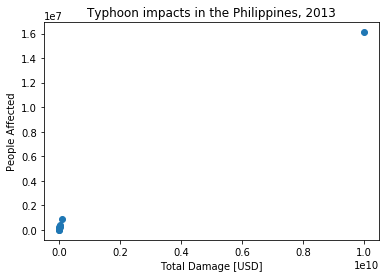

In [31]:
"""Total people affected by TCs in the Philippines in 2013:"""

# People affected
impact_emdat_PHL, countries = emdat_to_impact(emdat_file_path, 'TC', countries='PHL', \
                                    year_range=(2013,2013), imp_str="Total Affected")

print('Number of TC events in EM-DAT in the Philipppines, 2013: %i' \
      %(impact_emdat_PHL.event_id.size))
print('\nPeople affected by TC events in the Philippines in 2013 (per event):')
print(impact_emdat_PHL.at_event)
print('\nPeople affected by TC events in the Philippines in 2013 (total):')
print(int(impact_emdat_PHL.aai_agg))

# Comparison to monetary damages:
impact_emdat_PHL_USD, _ = emdat_to_impact(emdat_file_path, 'TC', countries='PHL', \
                                    year_range=(2013,2013))

ax = plt.scatter(impact_emdat_PHL_USD.at_event, impact_emdat_PHL.at_event)
plt.title('Typhoon impacts in the Philippines, 2013')
plt.xlabel('Total Damage [USD]')
plt.ylabel('People Affected');
#plt.xscale('log')
#plt.yscale('log')

### emdat_impact_yearlysum()

function to load EM-DAT impact data and return DataFrame with impact summed per year and country

##### Parameters:
- emdat_file_csv (str): Full path to EMDAT-file (CSV)

##### Optional parameters:

- hazard (list or str): List of Disaster (sub-)type according EMDAT terminology or CLIMADA hazard type abbreviations. e.g. ['Wildfire', 'Forest fire'] or ['BF']
- year_range (list with 2 integers): start and end year e.g. [1980, 2017]
- countries (list of str): country ISO3-codes or names, e.g. ['JAM', 'CUB']. Set to None or ['all'] for all countries 
- reference_year (int): reference year of exposures for normalization. Impact is scaled proportional to GDP to the value of the reference year. No scaling for reference_year=0 (default)
- imp_str (str): Column name of impact metric in EMDAT CSV, e.g. 'Total Affected'; default = "Total Damages"
- version (int): given EM-DAT data format version (i.e. year of download), changes naming of columns/variables (default: 2020)

##### Returns:
- pandas.DataFrame with impact per year and country

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2014
 2015 2016 2017 2018 2019 2020]


Text(0, 0.5, 'Total Damage [USD]')

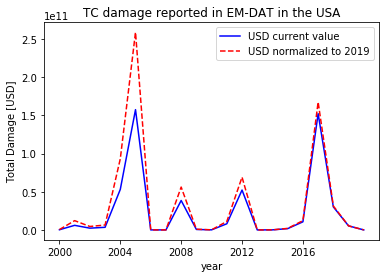

In [5]:
"""Yearly TC damages in the USA, normalized and current"""

yearly_damage_normalized_to_2019 = emdat_impact_yearlysum(emdat_file_path, countries='USA', \
                                                       hazard='Tropical cyclone', year_range=None, \
                                                       reference_year=2019)

yearly_damage_current = emdat_impact_yearlysum(emdat_file_path, countries=['USA'], hazard='TC',)

import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1)
axis.plot(yearly_damage_current.year, yearly_damage_current.impact, 'b', label='USD current value')
axis.plot(yearly_damage_normalized_to_2019.year, yearly_damage_normalized_to_2019.impact_scaled, \
          'r--', label='USD normalized to 2019')
plt.legend()
axis.set_title('TC damage reported in EM-DAT in the USA')
axis.set_xticks([2000, 2004, 2008, 2012, 2016])
axis.set_xlabel('year')
axis.set_ylabel('Total Damage [USD]');
